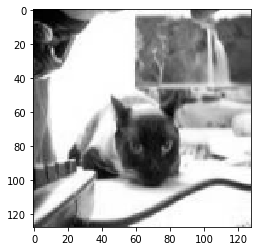

0


<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#cat = 0, dog = 1

def preprocess_img(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image_large = cv2.resize(image, (128,128))
    image_small = cv2.resize(image, (28, 28))
    
    image_large = image_large / 255
    image_small = image_small / 255
    return image_large, image_small
  
#initializing our dataset from the Kaggle Dataset
D1000 = [];
D1000_labels = [];
D_small = [];

#take the first 1000 images from the dataset for each class (1000 dogs and 1000 cats)
for i in range(0,1000):
    catName = "train/train/cat." + str(i) + ".jpg"
    data, data_small = preprocess_img(catName)
    D1000.append(data)
    D1000_labels.append(0)
    D_small.append(data_small)
    dogName = "train/train/dog." + str(i) + ".jpg"
    data, data_small = preprocess_img(dogName)
    D1000.append(data);
    D1000_labels.append(1);
    D_small.append(data_small)
    

    
plt.imshow(D1000[10], cmap="gray")
plt.show()
plt.savefig('exampleLarge.jpg')
print(D1000_labels[10])

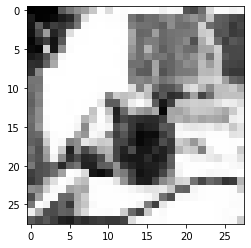

<Figure size 432x288 with 0 Axes>

In [19]:
plt.imshow(D_small[10], cmap="gray")
plt.show()
plt.savefig('exampleSmall.jpg')

In [2]:
import random

#shuffling the data
training_data = list(zip(D1000, D_small, D1000_labels))
random.shuffle(training_data)

D1000[:], D_small[:], D1000_labels[:] = zip(*training_data)

D1000_array = np.array(D1000).reshape(-1, 128, 128, 1) #if doing color data the 1 become a 3 
D_small_array = np.array(D_small).reshape(-1, 28, 28, 1) #if doing color data the 1 become a 3 
print(D1000_array.shape[:])
print(D_small_array.shape[:])

(2000, 128, 128, 1)
(2000, 28, 28, 1)


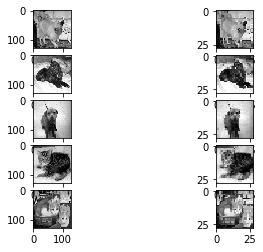

In [3]:
D_large = D1000
D_large_array = D1000_array
#showing Different resolutions
plt.subplot(5,2,1)
plt.imshow(D_large[0], cmap='gray')
plt.subplot(5,2,2)
plt.imshow(D_small[0], cmap='gray')
plt.subplot(5,2,3)
plt.imshow(D_large[1], cmap='gray')
plt.subplot(5,2,4)
plt.imshow(D_small[1], cmap='gray')
plt.subplot(5,2,5)
plt.imshow(D_large[2], cmap='gray')
plt.subplot(5,2,6)
plt.imshow(D_small[2], cmap='gray')
plt.subplot(5,2,7)
plt.imshow(D_large[3], cmap='gray')
plt.subplot(5,2,8)
plt.imshow(D_small[3], cmap='gray')
plt.subplot(5,2,9)
plt.imshow(D_large[4], cmap='gray')
plt.subplot(5,2,10)
plt.imshow(D_small[4], cmap='gray')
plt.savefig('diff_res.png',bbox_inches='tight')

In [4]:
#Creating our Training and Testing Data Sets
#80% training of our 1000+1000 dogs and cats
D1000_train = D1000_array[:1600]
D1000_train_labels = D1000_labels[:1600]

#20% testing of our 2000 images
D1000_test = D1000_array[-400:]
D1000_test_labels = D1000_labels[-400:]

#Creating our Training and Testing Data Set for the smaller amount of data
#pulling from the same data such that the results can be compared

D100_train = D1000_array[:160]
D100_train_labels = D1000_labels[:160]

#20% testing of our 200 images
D100_test = D1000_array[-40:]
D100_test_labels = D1000_labels[-40:]

#creating the training and testing data for our small resolution
D_small_train = D_small_array[:1600]
D_small_train_labels = D1000_labels[:1600]

#20% testing of our 2000 images
D_small_test = D_small_array[-400:]
D_small_test_labels = D1000_labels[-400:]

print(D1000_train.shape[:])
print(D1000_test.shape[:])
print(D100_train.shape[:])
print(D100_test.shape[:])
print(D_small_train.shape[:])
print(D_small_test.shape[:])

(1600, 128, 128, 1)
(400, 128, 128, 1)
(160, 128, 128, 1)
(40, 128, 128, 1)
(1600, 28, 28, 1)
(400, 28, 28, 1)


In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = D1000_train.shape[1:]))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))

model.add(tf.keras.layers.Dense(1))

model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#training on first 1600 elements (80% of our data)
model.fit(D1000_train, D1000_train_labels, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
1600/1600 [==============================] - 34s 21ms/sample - loss: 1.0012 - acc: 0.5031
Epoch 2/5
1600/1600 [==============================] - 37s 23ms/sample - loss: 0.6899 - acc: 0.5469
Epoch 3/5
1600/1600 [==============================] - 36s 22ms/sample - loss: 0.6688 - acc: 0.6031
Epoch 4/5
1600/1600 [==============================] - 32s 20ms/sample - loss: 0.6230 - acc: 0.6606
Epoch 5/5
1600/1600 [==============================] - 32s 20ms/sample - loss: 0.5240 - acc: 0.7462


In [7]:
#testing our trained data on the test data
#https://www.tensorflow.org/tutorials/keras/basic_classification

test_loss, test_acc = model.evaluate(D1000_test, D1000_test_labels)

print('Test accuracy:', test_acc)

400/400 [==============================] - 2s 5ms/sample - loss: 0.7342 - acc: 0.6100
Test accuracy: 0.61


In [8]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = D100_train.shape[1:]))
model2.add(tf.keras.layers.Activation("relu"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model2.add(tf.keras.layers.Conv2D(64, (3,3)))
model2.add(tf.keras.layers.Activation("relu"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64))

model2.add(tf.keras.layers.Dense(1))

model2.add(tf.keras.layers.Activation('sigmoid'))

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(D100_train,D100_train_labels, epochs=5)

Epoch 1/5
160/160 [==============================] - 3s 19ms/sample - loss: 2.8291 - acc: 0.4500
Epoch 2/5
160/160 [==============================] - 3s 17ms/sample - loss: 0.8426 - acc: 0.5375
Epoch 3/5
160/160 [==============================] - 3s 17ms/sample - loss: 0.6879 - acc: 0.4938
Epoch 4/5
160/160 [==============================] - 3s 17ms/sample - loss: 0.6468 - acc: 0.6125
Epoch 5/5
160/160 [==============================] - 3s 18ms/sample - loss: 0.5866 - acc: 0.7312


In [9]:
test_loss2, test_acc2 = model2.evaluate(D100_test, D100_test_labels)

print('Test accuracy for small size dataset:', test_acc2)

40/40 [==============================] - 0s 5ms/sample - loss: 0.7141 - acc: 0.5000
Test accuracy for small size dataset: 0.5


In [10]:
#we can train our model on the smaller resolution images and see how this accuracy compares

model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = D_small_train.shape[1:]))
model3.add(tf.keras.layers.Activation("relu"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(tf.keras.layers.Conv2D(64, (3,3)))
model3.add(tf.keras.layers.Activation("relu"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(64))

model3.add(tf.keras.layers.Dense(1))

model3.add(tf.keras.layers.Activation('sigmoid'))

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3.fit(D_small_train,D_small_train_labels, epochs=5)

Epoch 1/5
1600/1600 [==============================] - 1s 911us/sample - loss: 0.7063 - acc: 0.4869
Epoch 2/5
1600/1600 [==============================] - 1s 816us/sample - loss: 0.6919 - acc: 0.5206
Epoch 3/5
1600/1600 [==============================] - 1s 843us/sample - loss: 0.6799 - acc: 0.5519
Epoch 4/5
1600/1600 [==============================] - 1s 815us/sample - loss: 0.6716 - acc: 0.5881s - loss: 0.6583 - 
Epoch 5/5
1600/1600 [==============================] - 1s 809us/sample - loss: 0.6498 - acc: 0.6288


In [11]:
test_loss_small, test_acc_small = model3.evaluate(D_small_test, D_small_test_labels)

print('Test accuracy for small resolution dataset:', test_acc_small)

400/400 [==============================] - 0s 313us/sample - loss: 0.6512 - acc: 0.5925
Test accuracy for small resolution dataset: 0.5925


In [12]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = D1000_train.shape[1:]))
model4.add(tf.keras.layers.Activation("relu"))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model4.add(tf.keras.layers.Conv2D(64, (3,3)))
model4.add(tf.keras.layers.Activation("relu"))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(64))

model4.add(tf.keras.layers.Dense(1))

model4.add(tf.keras.layers.Activation('sigmoid'))

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#training on first 1600 elements (80% of our data)
model4.fit(D1000_train, D1000_train_labels, epochs=5)

Epoch 1/5
1600/1600 [==============================] - 30s 18ms/sample - loss: 0.9162 - acc: 0.5319
Epoch 2/5
1600/1600 [==============================] - 32s 20ms/sample - loss: 0.6749 - acc: 0.5856
Epoch 3/5
1600/1600 [==============================] - 35s 22ms/sample - loss: 0.6260 - acc: 0.6575
Epoch 4/5
1600/1600 [==============================] - 50s 31ms/sample - loss: 0.5654 - acc: 0.7237
Epoch 5/5
1600/1600 [==============================] - 52s 33ms/sample - loss: 0.4747 - acc: 0.7631


In [13]:
test_loss_large, test_acc_large = model4.evaluate(D1000_test, D1000_test_labels)

print('Test accuracy for large resolution dataset:', test_acc_large)

400/400 [==============================] - 3s 7ms/sample - loss: 0.7302 - acc: 0.6125
Test accuracy for large resolution dataset: 0.6125


In [14]:
def preprocess_img(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image_large = cv2.resize(image, (128,128))
    image_small = cv2.resize(image, (28, 28))
    
    image_large = image_large / 255
    image_small = image_small / 255
    return image_large, image_small

outliers_large = [];
outliers_small = [];

for i in range(1,11):
    path = "Outliers/" + str(i) + ".jpg"
    data_l, data_s = preprocess_img(path);
    outliers_large.append(data_l)
    outliers_small.append(data_s)


outliers_l_array = np.array(outliers_large).reshape(-1, 128, 128, 1) #if doing color data the 1 become a 3 
outliers_s_array = np.array(outliers_small).reshape(-1, 28, 28, 1) #if doing color data the 1 become a 3 
    
predictors1 = model.predict_classes(outliers_l_array)
predictors2 = model2.predict_classes(outliers_l_array)  
predictors3 = model3.predict_classes(outliers_s_array)
predictors4 = model4.predict_classes(outliers_l_array)

image # 1  classifications [0] [1] [0] [1]
image # 2  classifications [1] [1] [1] [0]
image # 3  classifications [1] [1] [1] [0]
image # 4  classifications [0] [1] [0] [0]
image # 5  classifications [0] [1] [1] [0]
image # 6  classifications [1] [1] [1] [1]
image # 7  classifications [1] [1] [1] [1]
image # 8  classifications [1] [1] [1] [0]
image # 9  classifications [1] [1] [1] [0]
image # 10  classifications [0] [1] [1] [1]


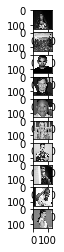

In [17]:
for i in range(0,len(predictors1)):
    print("image #", i+1, " classifications", predictors1[i],predictors2[i],predictors3[i],predictors4[i])

#showing Different resolutions
plt.subplot(10,1,1)
plt.imshow(outliers_large[0], cmap='gray')
plt.subplot(10,1,2)
plt.imshow(outliers_large[1], cmap='gray')
plt.subplot(10,1,3)
plt.imshow(outliers_large[2], cmap='gray')
plt.subplot(10,1,4)
plt.imshow(outliers_large[3], cmap='gray')
plt.subplot(10,1,5)
plt.imshow(outliers_large[4], cmap='gray')
plt.subplot(10,1,6)
plt.imshow(outliers_large[5], cmap='gray')
plt.subplot(10,1,7)
plt.imshow(outliers_large[6], cmap='gray')
plt.subplot(10,1,8)
plt.imshow(outliers_large[7], cmap='gray')
plt.subplot(10,1,9)
plt.imshow(outliers_large[8], cmap='gray')
plt.subplot(10,1,10)
plt.imshow(outliers_large[9], cmap='gray')

plt.savefig('outliers.png')

In [22]:
#saving model to see size comparison in MBs
model.save("model1")
model2.save("model2")
model3.save("model3")
model4.save("model4")